In [116]:
import pandas as pd
import matplotlib.pyplot as plt

Membaca file DataFrame.csv

In [117]:
lr = pd.read_csv(r'D:\temp\tubes2\harvardnobeldata\laureate.csv')

Cleansing Data untuk perbandingan imigran

Data kotor: data nama negara yang masih merujuk nama pada tahun tertentu sebelum namanya seperti sekarang. Contoh: seorang laureate lahir di Polandia yang saat itu dikuasai Jerman, sehingga pada data dituliskan 'German-occupied Poland (now Poland)'
Data kotor diubah dengan nama negara yang mengikuti kondisi zaman sekarang

Data kotor: data hilang (NaN)
Data kotor ditangani dengan menghapus baris terkait

In [ ]:
cntry_born = lr['bornCountry'].tolist()
for i in range(len(cntry_born)):
    if pd.isna(cntry_born[i]) == True:
        pass
    else:
        if 'now' in cntry_born[i]:
            cntry_born[i] = cntry_born[i].replace(')', '').replace('(', '')
            splt = cntry_born[i].split(' ')
            if splt[-2] == 'now':
                cntry_born[i] = splt[-1]
            else:
                cntry_born[i] = ' '.join(splt[splt.index('now') + 1:-1]) + ' ' + splt[-1]
lr['bornCountry'] = cntry_born
lr.loc[lr['country'] == 'Alsace (then Germany, now France)']['country'] = 'France'; lr.loc[lr['country'] == 'Federal Republic of Germany']['country'] = 'Germany'; lr.loc[lr['country'] == 'USSR']['country'] = 'Russia'
lr = lr.dropna(subset=['bornCountry', 'country'])

Penambahan atribut baru 'age_at_prize' yaitu usia laureates saat menerima nobel prize

In [126]:
lr = lr.loc[(lr['born'] != '0000-00-00') & (lr['died'] != '0000-00-00')]
lr['age_at_prize'] = lr['year'] - lr['born'].apply(lambda x: x.split('-')[0]).astype(float)
print(lr['age_at_prize'])
print(lr)

0      56.0
1      49.0
2      37.0
3      51.0
4      44.0
       ... 
874    79.0
880    71.0
881    71.0
886    68.0
913    89.0
Name: age_at_prize, Length: 445, dtype: float64
      id       firstname    surname        born        died      bornCountry  \
0      1  Wilhelm Conrad    Röntgen  1845-03-27  1923-02-10          Germany   
1      2  Hendrik Antoon    Lorentz  1853-07-18  1928-02-04  the Netherlands   
2      3          Pieter     Zeeman  1865-05-25  1943-10-09  the Netherlands   
3      4   Antoine Henri  Becquerel  1852-12-15  1908-08-25           France   
4      5          Pierre      Curie  1859-05-15  1906-04-19           France   
..   ...             ...        ...         ...         ...              ...   
874  851      Richard F.       Heck  1931-08-15  2015-10-09              USA   
880  857         Dale T.  Mortensen  1939-02-02  2014-01-09              USA   
881  857         Dale T.  Mortensen  1939-02-02  2014-01-09              USA   
886  863        Ralp

Text(0, 0.5, 'Jumlah Laureates')

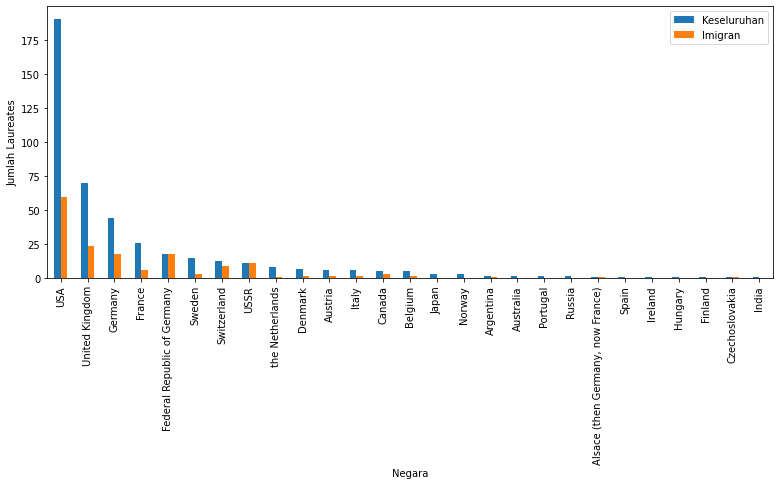

In [120]:
ctries = lr.groupby('country').size().sort_values(ascending=False).rename('Keseluruhan')
lr1 = lr.loc[lr['bornCountry'] != lr['country']]
imm_cntry = lr1.groupby('country').size().sort_values(ascending=False).rename('Imigran')
df = pd.concat([ctries, imm_cntry], axis=1)
df.plot.bar(figsize=(13,5))
plt.xlabel('Negara'); plt.ylabel('Jumlah Laureates')